In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('E:\Datasets\CarPrice_Assignment.csv')

In [5]:
pd.set_option('display.max.columns',None)

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#Checks for strong correlation btwn features
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [8]:
#Extracting features for the model

df1 = pd.DataFrame()

df1 = df[['enginesize','stroke','horsepower','compressionratio','curbweight','carwidth','price']]
df1.iloc[0:25]

,enginesize,stroke,horsepower,compressionratio,curbweight,carwidth,price
0,130,2.68,111,9.00,2548,64.1,13495.000
1,130,2.68,111,9.00,2548,64.1,16500.000
2,152,3.47,154,9.00,2823,65.5,16500.000
3,109,3.40,102,10.00,2337,66.2,13950.000
4,136,3.40,115,8.00,2824,66.4,17450.000
5,136,3.40,110,8.50,2507,66.3,15250.000
6,136,3.40,110,8.50,2844,71.4,17710.000
7,136,3.40,110,8.50,2954,71.4,18920.000
8,131,3.40,140,8.30,3086,71.4,23875.000
9,131,3.40,160,7.00,3053,67.9,17859.167


In [9]:
# defining the X and Y features

X = df1.iloc[:,0].values.reshape(-1,1)
Y = df1.iloc[:,-1]

In [10]:
#from sklearn.preprocessing import StandardScaler

#Scale = StandardScaler()

#X_stand = Scale.fit_transform(X)

#X_stand.shape

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state = 4)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 1)
(62, 1)
(143,)
(62,)


In [13]:
# transforming x features

poly = PolynomialFeatures(degree = 3)
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
X_train_poly

LR = LinearRegression()

model = LR.fit(X_train_poly,y_train)

In [26]:
Coefficient = model.coef_
Coefficient

array([ 0.00000000e+00, -6.42298885e+02,  4.88606241e+00, -8.79858634e-03])

In [28]:
Intercept = model.intercept_
Intercept

32904.79532796165

In [44]:
y_predict = model.predict(X_test_poly)
y_predict

array([12649.90078395, 18210.29006173,  8317.5765355 , 24547.64950845,
       37412.64728046,  9551.09986722, 24547.64950845, 13792.30046399,
       11136.23754531, 20173.24107647,  9443.86288361, 14816.07727442,
        8604.08889545,  8317.5765355 ,  8317.5765355 , 25071.42132963,
       10984.27060975,  8544.53249482, 21950.24864814, 18210.29006173,
       14816.07727442,  8317.5765355 ,  8260.83174721, 11291.588832  ,
       10984.27060975,  9908.48964399,  8544.53249482,  9551.09986722,
        8544.53249482,  8969.79340886,  8260.83174721, 17264.00477769,
       13792.30046399,  8544.53249482, 17264.00477769, 41324.91294642,
       11136.23754531, 14816.07727442, 14816.07727442, 15898.06710403,
        8544.53249482,  9443.86288361,  8260.83174721,  8317.5765355 ,
        8544.53249482,  8260.83174721,  9551.09986722, 41324.91294642,
       15898.06710403,  8260.83174721, 20173.24107647,  8604.08889545,
       10984.27060975,  9662.35470018, 31767.23093522,  8260.83174721,
      

In [19]:
X_test_poly[0:5]

array([[1.0000000e+00, 1.3000000e+02, 1.6900000e+04, 2.1970000e+06],
       [1.0000000e+00, 1.5600000e+02, 2.4336000e+04, 3.7964160e+06],
       [1.0000000e+00, 9.2000000e+01, 8.4640000e+03, 7.7868800e+05],
       [1.0000000e+00, 1.8100000e+02, 3.2761000e+04, 5.9297410e+06],
       [1.0000000e+00, 2.3400000e+02, 5.4756000e+04, 1.2812904e+07]])

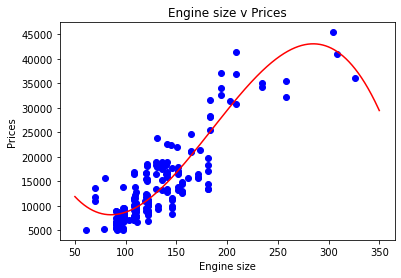

In [36]:
x_axis = np.arange(50,350,0.1)
response = Intercept + Coefficient[1]*x_axis + Coefficient[2]*x_axis**2 + Coefficient[3]*x_axis**3

plt.scatter(X,Y, color = 'blue')
plt.plot(x_axis,response, color = 'red', linewidth = 1.5)
plt.xlabel('Engine size')
plt.ylabel('Prices')
plt.title('Engine size v Prices')
#plt.grid()
plt.show()

In [38]:
r_sq = model.score(X_test_poly,y_test)
r_sq

0.75832704824767

In [45]:
from sklearn.metrics import r2_score

r2_score(y_predict,y_test)

0.7547385760289513